# Fourier filtering

Fourier transforms can be used to filter signals, e.g. we may be interested in removing low- or high-frequencies from a signal.


This is particularly useful for image analysis, and there is a series of algorithms dedicated to image filtering.


- **Low-pass filtering:** filters out the high (spatial) frequencies, i.e. large-scale structure.


- **High-pass filtering:** filters out the low (spatial) frequencies, i.e. small-scale structure.


## Example:

(a) Generate 3 sine waves with frequencies $1\rm Hz$, $5 Hz$, and $8 Hz$, amplitudes $4$, $2$ and $0.25$, and phase all zeros.

(b) Plot this $3$ sine waves together with a sampling rate $128 Hz$.

(c) Calculate the FFT of the resulting signal and return the Fourier amplitudes and phases.

(d) Filter out the highest and lowest frequency components from the signal and return the iFFT of it.

(e) Compare it to the iFFT of the original signal.

In [5]:
import numpy as np

import matplotlib.pyplot as plt

In [6]:
def sine_wave(amp, freq, t):
    # amp  = amplitude
    # freq = frequency
    # t    = time_axis
    
    return amp*np.sin(2*np.pi*freq*t)

In [7]:
# sampling rate
s_rate = 128 #Hz

# sampling interval
s_interval = 1.0/s_rate

# t_axis
t = np.arange(0, 1, s_interval)

# y axis
signal_3 = sine_wave(4,1,t) + sine_wave(2,5,t) + sine_wave(0.25,8,t)

### Plotting:

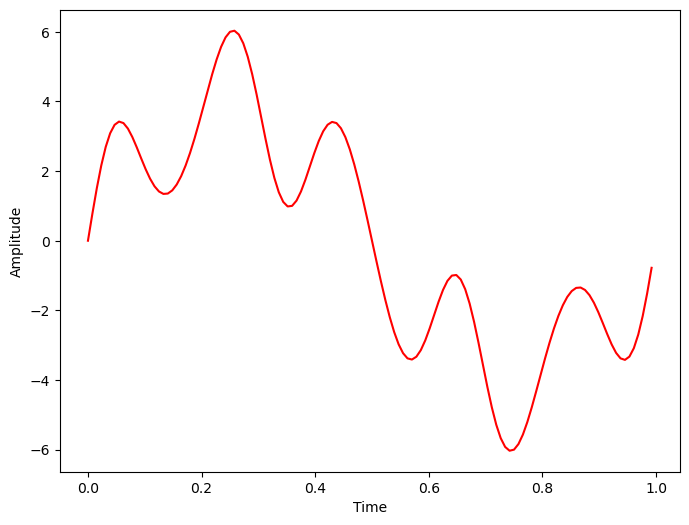

In [8]:
plt.figure(figsize = (8, 6))
plt.plot(t, signal_3, 'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

## Fourier transforms:

In [31]:
# Fourier transform:

fourier_s3 = np.fft.fft(signal_3)

# Let's make some copies of the FFT:

filtered_s3_1 = fourier_s3.copy()
filtered_s3_2 = fourier_s3.copy()


# Calculate frequencies:

freqs_s3 = np.fft.fftfreq(signal_3.size, s_interval)

# Norm of Fourier transform

ampli_s3 = np.abs(fourier_s3)/(signal_3.size//2)

# Fourier Phases

phase_s3 = np.arctan2(fourier_s3.imag, fourier_s3.real)

## Fourier plots:

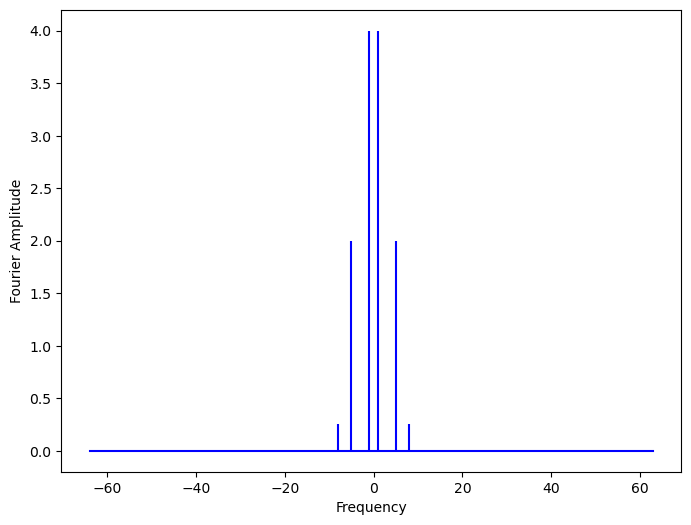

In [32]:
plt.figure(figsize = (8, 6))
plt.stem(freqs_s3, ampli_s3, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')

plt.show()

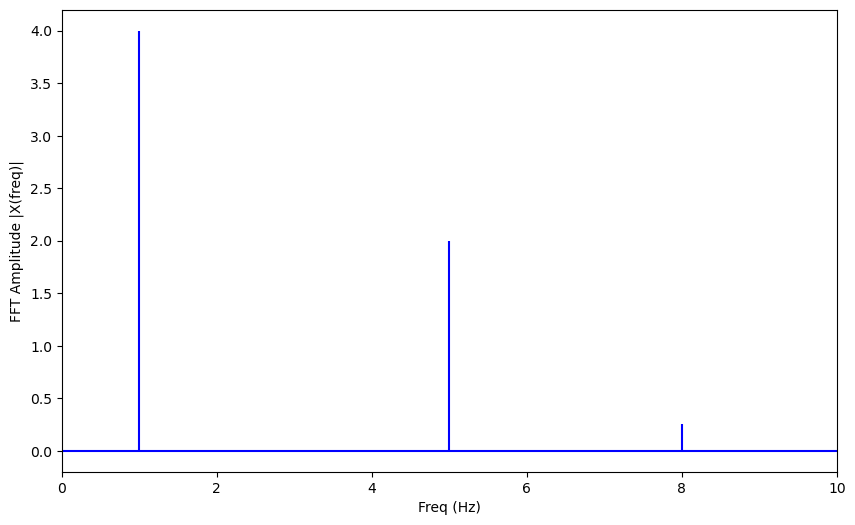

In [33]:
plt.figure(figsize = (10, 6))
plt.stem(freqs_s3, ampli_s3, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,10)
plt.show()

<Figure size 1000x600 with 0 Axes>

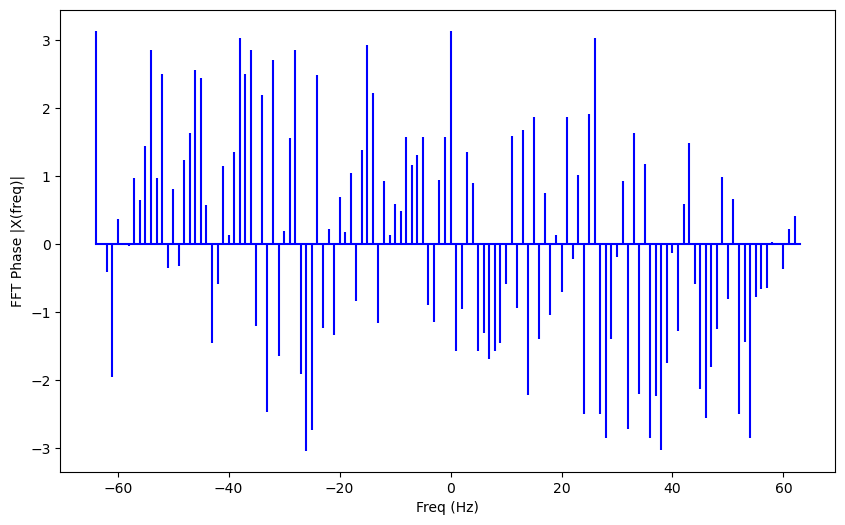

In [18]:
plt.figure(figsize = (10, 6))
plt.stem(freqs_s3, phase_s3, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Phase |X(freq)|')
#plt.xlim(0,10)
plt.show()

## Inverse Fourier transform:

In [21]:
invF_s3 = np.fft.ifft(fourier_s3)

#print(invF_s3)

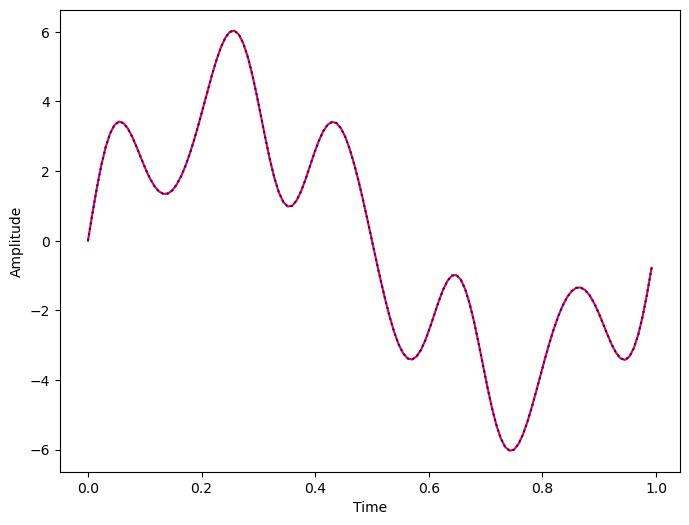

In [23]:
plt.figure(figsize = (8, 6))
# Original signal:
plt.plot(t, signal_3, 'r')
# iFFT signal:
plt.plot(t, invF_s3.real, 'b', linestyle = ":")
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

# High-pass Filter:

We assign zeros to the FFT amplitudes where the absolute frequencies are smaller than the high cut-off frequency.


## Example:

Filter out the lowest frequency (1Hz).


In [47]:
# Cut-off frequency
h_cutoff = 4  #Hz
h_cutoff_2 = 6  #Hz


# Filtered Fourir signal
filtered_s3_1[np.abs(freqs_s3) < h_cutoff ] = 0
filtered_s3_2[np.abs(freqs_s3) < h_cutoff_2 ] = 0

# Norm of FILTERED Fourier transform

ampli_filtered_s3_1 = np.abs(filtered_s3_1)/(signal_3.size//2)
ampli_filtered_s3_2 = np.abs(filtered_s3_2)/(signal_3.size//2)

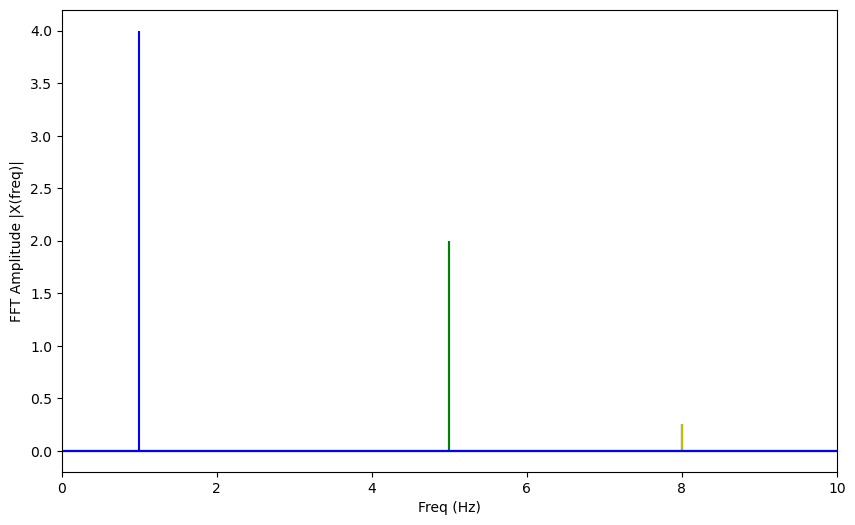

In [48]:
plt.figure(figsize = (10, 6))
plt.stem(freqs_s3, ampli_s3, 'b', markerfmt=" ", basefmt="-b")
plt.stem(freqs_s3, ampli_filtered_s3_1, 'g', markerfmt=" ", basefmt="-b")
plt.stem(freqs_s3, ampli_filtered_s3_2, 'y', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,10)
plt.show()

### Inverse Fourier transform of filtered signal:

In [49]:
inv_filtered_s3_1 = np.fft.ifft(filtered_s3_1)

inv_filtered_s3_2 = np.fft.ifft(filtered_s3_2)

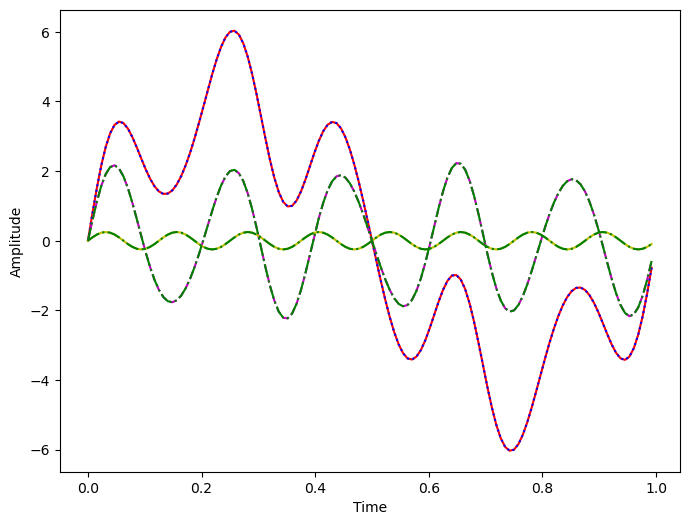

In [52]:
plt.figure(figsize = (8, 6))
# Original signal:
plt.plot(t, signal_3, 'r')

# iFFT signal:
plt.plot(t, invF_s3.real, 'b', linestyle = ":")

# iFFT filtered signal:
plt.plot(t, inv_filtered_s3_1.real, 'm', linestyle = "--")
plt.plot(t, inv_filtered_s3_2.real, 'y', linestyle = "-")

# Higher frequency signals:
plt.plot(t, sine_wave(2,5,t) + sine_wave(0.25,8,t), 'g', linestyle = "-.")
plt.plot(t, sine_wave(0.25,8,t), 'g', linestyle = "-.")

plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

# Low-pass Filter:

We assign zeros to the FFT amplitudes where the absolute frequencies are larger than the low cut-off frequency.


In [56]:
l_cutoff_3 = 7

filtered_s3_1[np.abs(freqs_s3) > l_cutoff_3] = 0

inv_filter_s3_1 = np.fft.ifft(filtered_s3_1)

# Norm of FILTERED Fourier transform

ampli_filtered_s3_1 = np.abs(filtered_s3_1)/(signal_3.size//2)

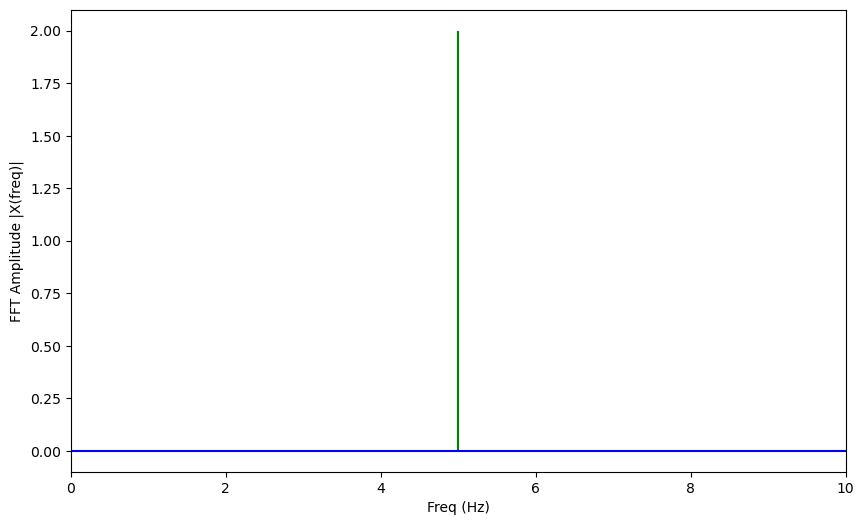

In [57]:
plt.figure(figsize = (10, 6))
#plt.stem(freqs_s3, ampli_s3, 'b', markerfmt=" ", basefmt="-b")
plt.stem(freqs_s3, ampli_filtered_s3_1, 'g', markerfmt=" ", basefmt="-b")
#plt.stem(freqs_s3, ampli_filtered_s3_2, 'y', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,10)
plt.show()

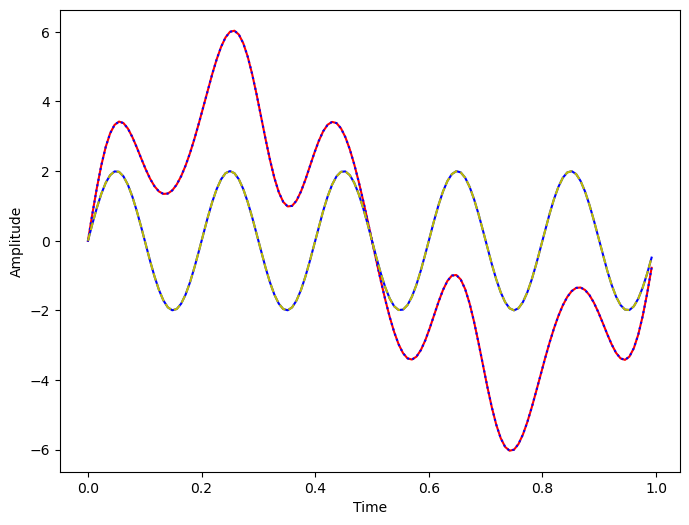

In [65]:
plt.figure(figsize = (8, 6))
plt.plot(t, signal_3, 'r')
plt.plot(t, invF_s3.real, 'b', linestyle = ":")
plt.plot(t, sine_wave(2,5,t), 'b')
plt.plot(t, inv_filter_s3_1.real, 'y', linestyle = "--")
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()